# cosmology package comparison: astropy vs colossus

since `astropy.cosmology` is not complete, I usually use `colussus` for cosmology calculations. Here is a basic reference of how to use `colossus`.

We compare `astropy.cosmoloy` ('ascosmo') and `colossus` ('cosmo') for the following cosmological calculations:

In [2]:
from scipy.misc import derivative
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

In [3]:
from astropy.cosmology import Planck15 as ascosmo
import astropy.units as u
from colossus.cosmology import cosmology
cosmo = cosmology.setCosmology('planck15')

the parameters names are same.

In [4]:
h = cosmo.h
H0 = cosmo.H0 
OmM, OmL = cosmo.Om0, cosmo.Ode0
h, H0, OmM, OmL, OmM+OmL

(0.6774, 67.74, 0.3089, 0.6910088292453472, 0.9999088292453473)

In [13]:
ascosmo.H0

<Quantity 67.74 km / (Mpc s)>

`colussus` use unit Mpc/h, while `astropy.cosmology` use Mpc and calculate with units. 
we prepare unit Mpc/h for `colussus` here:

In [5]:
Mpc_per_h = u.def_unit('Mpc/h', u.Mpc / h)
(1*u.Mpc).to(Mpc_per_h)

<Quantity 0.6774 Mpc/h>

## H(z)

In [6]:
z=1.2
cosmo.Hz(z)*u.km/u.s/u.Mpc

<Quantity 135.18011774 km / (Mpc s)>

In [7]:
ascosmo.H(z)

<Quantity 135.17733731 km / (Mpc s)>

## comoving distance

In [8]:
ascosmo.comoving_distance(z)

<Quantity 3865.80714198 Mpc>

In [9]:
d = cosmo.comovingDistance(0, z) * Mpc_per_h 
print(d, d.to(u.Mpc))

2618.6773883362994 Mpc/h 3865.7770716508703 Mpc


## colussus-only

### growth factor

In [10]:
def GrowthRate(z):
    a = 1/(1+z)
    
    def D(a):
        z = 1/a - 1
        return cosmo.growthFactor(z) 
    
    def logarithmic_derivative(a):
        # 使用 scipy 的 derivative 函数来计算导数
        dD_da = derivative(D, a, dx=1e-6)
        # 计算对数导数
        dlnD_dlna = dD_da * a / D(a)
        return dlnD_dlna    
    
    return logarithmic_derivative(a)

def f(z):
    return GrowthRate(z)


### linear power spectrum

In [11]:
ks = np.logspace(-4, 1, 100)
pks_mz = cosmo.matterPowerSpectrum(ks, z)
pks_m0 = cosmo.matterPowerSpectrum(ks, 0)

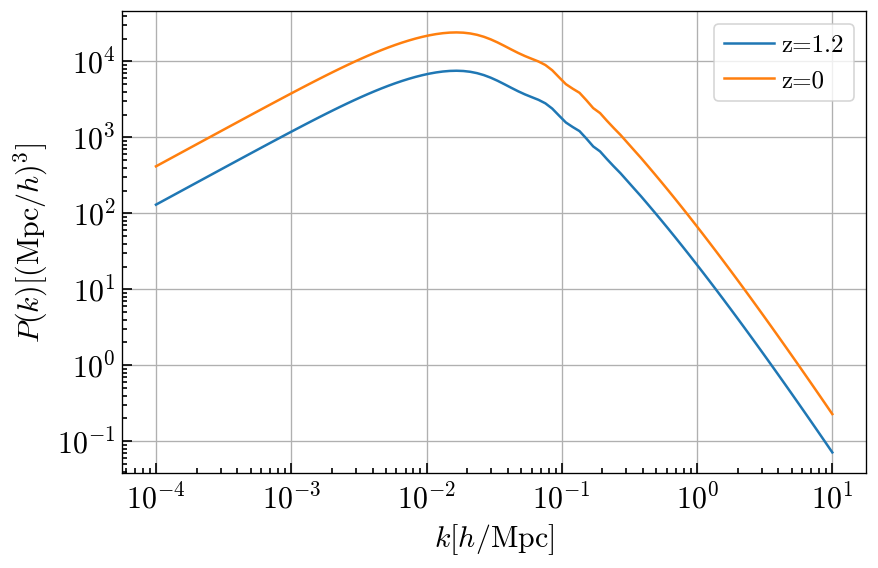

In [12]:
plt.plot(ks, pks_mz, label=f'z={z}')
plt.plot(ks, pks_m0, label=f'z=0')
plt.xlabel(r'$k [h/{\rm Mpc}]$')
plt.xscale('log')
plt.ylabel(r'$P(k) [({\rm Mpc}/h)^3]$')
plt.yscale('log')
plt.legend()